In [145]:
from Library.DataAnalyzer import DataAnalyzer
from Library.DataPreprocessor import DataPreprocessor
from Library.DataVisualizer import DataVisualizer
from Library.ClusteringEngine import ClusteringEngine

from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

import pandas as pd
import numpy as np

In [2]:
preprocessor = DataPreprocessor()
analyzer = DataAnalyzer()
visualizer = DataVisualizer()
trainer = ClusteringEngine()

aff = AffinityPropagation(damping=0.9)
agg = AgglomerativeClustering(n_clusters=3)
br = Birch(threshold= 0.01, n_clusters= 4)
db = DBSCAN(eps= 0.30, min_samples=9)
mbkm = MiniBatchKMeans(n_clusters=3)
ms = MeanShift()
opt = OPTICS(eps= 0.8, min_samples=10)
spec = SpectralClustering(n_clusters= 4)
gmix = GaussianMixture(n_components=3)
km = KMeans(n_clusters=4)

# Add the algorithms you define to the array
myAlgorithmArray = [aff, agg, br, db, mbkm, ms, opt, spec, gmix, km]


# Read File

In [3]:
df = pd.read_csv("Data/PBL5recommendationdata.csv", encoding='ISO-8859-1') 

# Exploratory Data Analysis

In [4]:
df.shape

(4194, 181)

In [5]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [6]:
df.describe()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,...,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
count,4194.000000,4.194000e+03,101.0,2114.000000,0.0,5.000000,3.000000,0.0,0.0,0.0,...,2080.000000,0.0,3998.000000,3998.000000,3998.000000,659.000000,387.000000,0.0,3930.000000,0.0
mean,1796.518121,1.440971e+09,0.0,0.979659,NaN,0.200000,7.333333,NaN,NaN,NaN,...,0.064423,NaN,17.208216,10.872750,11.592447,15.487041,3.863049,NaN,0.876336,NaN
std,1065.679090,1.887681e+07,0.0,0.141196,NaN,0.447214,0.577350,NaN,NaN,NaN,...,0.245564,NaN,10.508782,6.781847,10.250909,22.256617,2.098446,NaN,1.364374,NaN
min,3.000000,1.386089e+09,0.0,0.000000,NaN,0.000000,7.000000,NaN,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,0.000000,0.020000,0.000000,NaN,0.000000,NaN
25%,865.250000,1.427323e+09,0.0,1.000000,NaN,0.000000,7.000000,NaN,NaN,NaN,...,0.000000,NaN,9.000000,5.700000,4.000000,2.775000,5.000000,NaN,0.000000,NaN
50%,1747.500000,1.446412e+09,0.0,1.000000,NaN,0.000000,7.000000,NaN,NaN,NaN,...,0.000000,NaN,15.500000,10.000000,8.645000,8.900000,5.000000,NaN,0.000000,NaN
75%,2698.750000,1.456955e+09,0.0,1.000000,NaN,0.000000,7.500000,NaN,NaN,NaN,...,0.000000,NaN,23.500000,15.000000,15.000000,21.000000,5.000000,NaN,3.000000,NaN
max,3736.000000,1.463418e+09,0.0,1.000000,NaN,1.000000,8.000000,NaN,NaN,NaN,...,1.000000,NaN,90.000000,80.000000,58.000000,175.000000,5.000000,NaN,3.000000,NaN


In [7]:
df.corr()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,...,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
Customers.id,1.000000,0.951397,NaN,0.087253,NaN,-0.639947,1.0,NaN,NaN,NaN,...,-0.018854,NaN,-0.158864,-0.144105,-0.151182,-0.098889,-0.282855,NaN,0.055784,NaN
Customers.create_date,0.951397,1.000000,NaN,0.094404,NaN,-0.612277,1.0,NaN,NaN,NaN,...,-0.000640,NaN,-0.141344,-0.139152,-0.148081,-0.112419,-0.267895,NaN,0.044648,NaN
Customers.status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customers.mailing,0.087253,0.094404,NaN,1.000000,NaN,0.408248,NaN,NaN,NaN,NaN,...,0.010831,NaN,-0.040306,-0.011972,-0.060829,-0.028993,-0.068431,NaN,-0.026729,NaN
Customers.reminders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Products.shipping_weight,-0.098889,-0.112419,NaN,-0.028993,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.123965,NaN,0.655903,0.618477,0.576302,1.000000,-0.040242,NaN,0.245913,NaN
Products.google_shopping_label,-0.282855,-0.267895,NaN,-0.068431,NaN,NaN,NaN,NaN,NaN,NaN,...,0.047951,NaN,0.476260,0.383527,0.607789,-0.040242,1.000000,NaN,-0.156635,NaN
Products.leg_style,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Products.saved_status,0.055784,0.044648,NaN,-0.026729,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.200846,NaN,-0.063630,-0.248860,0.213373,0.245913,-0.156635,NaN,1.000000,NaN


In [8]:
analyzer.calculateNullValuesSum(df)

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [10]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
1810,1510,Jane,Shepherd,NaN,1441034357,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF70685,0.0,NaN
1558,1308,Glenn,Stancliff,NaN,1437159193,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04832,0.0,NaN
371,333,Lucinda,King,NaN,1410548833,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,Medium/Large,NaN,NaN,NaN,NaN,PF01409,0.0,NaN
944,787,Ruby,Henson,NaN,1425677994,NaN,1.0,NaN,NaN,NaN,...,NaN,Rail Parallel with Bathtub,NaN,NaN,NaN,NaN,NaN,BS12,0.0,NaN
3393,2931,Martha,Congdon,NaN,1458766842,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04657,3.0,NaN


In [11]:
df["Customers.status"].value_counts()

0.0    101
Name: Customers.status, dtype: int64

In [12]:
analyzer.findColumnsWithMissingValuesAboveThreshold(df, 85)

[('Customers.status', 97.59179780639008),
 ('Customers.reminders', 100.0),
 ('Customers.tax_exempt', 99.88078206962328),
 ('Customers.account_id', 99.92846924177397),
 ('Customers.sales_rep', 100.0),
 ('Customers.rewards', 100.0),
 ('Customers.profile_id', 100.0),
 ('Orders.reorder_id', 98.04482594182164),
 ('Orders.external_source', 91.29709108249881),
 ('Orders.external_id', 99.88078206962328),
 ('Orders.sales_rep', 100.0),
 ('Orders.gift_id', 100.0),
 ('Orders.gift_amount', 100.0),
 ('Orders.fee_name', 94.58750596089652),
 ('Orders.fee_amount', 93.37148307105389),
 ('Orders.discount_name', 93.27610872675251),
 ('Orders.discount_amount', 91.32093466857415),
 ('Orders.balance_due', 91.63090128755364),
 ('Orders.shipping_trans', 100.0),
 ('Orders.shipping_flags', 100.0),
 ('Orders.weight', 99.92846924177397),
 ('Orders.purchase_order', 100.0),
 ('Orders.payment_ref', 100.0),
 ('Orders.comments', 93.15689079637578),
 ('Orders.registry_id', 100.0),
 ('Orders.gift_message', 100.0),
 ('Ord

In [13]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Customers.status", "Customers.reminders", "Customers.tax_exempt", "Customers.account_id", "Customers.sales_rep", "Customers.rewards", "Customers.company", "Orders.company", "Orders.coupon_id", "Orders.payment_method", "Order_Items.flags", "Products.sale_price", "Products.left_flag", "Products.video", "Products.seo_keywords", "Products.length", "Products.width", "Products.height", "Products.rx", "Orders.coupon_amount", "Products.msds_label", "Products.warranty", "Products.shipping_weight", "Products.handling_time", "Products.material", "Customers.profile_id", "Orders.reorder_id", "Orders.website", "Products.shopping_age", "Products.seo_footer", "Products.rotation_link", "Orders.external_source", "Orders.external_id", "Orders.sales_rep", "Orders.gift_id", "Orders.gift_amount", "Orders.fee_name", "Orders.fee_amount", "Orders.discount_name", "Orders.discount_amount", "Orders.balance_due", "Orders.shipping_trans", "Orders.shipping_flags", "Orders.weight", "Orders.purchase_order", "Orders.payment_ref", "Orders.comments", "Orders.registry_id", "Orders.gift_message", "Orders.mailing", "Orders.flags", "Orders.partial_ship", "Order_Items.attributes", "Order_Items.attribute_names", "Order_Items.attribute_prices", "Order_Items.registry_item", "Order_Items.related_id", "Order_Items.reorder_frequency", "Order_Items.account_id", "Products.product_type", "Products.menu_name", "Products.right_flag", "Products.shopping_gender", "Products.amazon_type", "Products.amazon_price", "Products.google_adwords", "Products.price_break_type", "Products.price_breaks", "Products.websites", "Products.audio", "Products.seo_description", "Products.seo_header", "Products.display_packaging", "Products.msds_link", "Products.markup", "Products.notes", "Products.map_price", "Products.features_title", "Products.default_quantity", "Products.user_size", "Products.assembly", "Products.installation", "Products.google_shopping_label", "Products.product_option", "Products.arm_style", "Products.leg_style", "Products.seat_size", "Products.freight_cost"])

In [14]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,...,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.size,Products.family_id,Products.saved_status
0,797,Christy,Dill,1426018724,NaN,1437764306,0.0,3758,797,Christy,...,1.0,0.0,136.0,0.0,24.80,7.50,30.40,NaN,PF61071,0.0
1,3,John,Smith,1386089139,NaN,1437764354,0.0,23,3,John,...,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,PF02132,NaN
2,3,John,Smith,1386089139,NaN,1437764354,0.0,9531,3,John,...,800.0,0.0,NaN,NaN,13.23,10.04,10.24,2 x Extra large,PF00342,0.0
3,4,James,Anderson,1386780263,NaN,1437762646,0.0,29,4,James,...,1.0,0.0,NaN,NaN,10.60,7.80,18.50,NaN,PF04970,NaN
4,5,Abraham,Pollak,1386861599,0.0,1437764316,0.0,30,5,Abraham,...,1.0,0.0,NaN,NaN,8.50,2.75,12.00,NaN,PF03045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,1463408698,1.0,1463408698,0.0,17421,3730,Nora,...,24.0,1.0,418.0,0.0,5.00,5.00,7.00,NaN,PF06157,3.0
4190,3732,Kennithe,Tecora,1463412756,NaN,1463412756,NaN,17425,3732,Kennithe,...,1.0,0.0,128.0,0.0,14.60,4.10,18.00,NaN,PF08485,3.0
4191,3733,Tinna,Randall,1463413245,NaN,1463413245,NaN,17426,3733,Tinna,...,NaN,0.0,128.0,0.0,45.00,20.75,20.75,NaN,PM36,3.0
4192,3735,HALIMAH,SHAHID,1463416687,1.0,1463416687,NaN,17431,3735,HALIMAH,...,1.0,0.0,8.0,0.0,25.25,8.60,23.20,NaN,PF04829,3.0


In [15]:
analyzer.findColumnsWithMissingValuesAboveThreshold(df, 70)

[]

In [16]:
df.shape

(4194, 93)

In [17]:
analyzer.calculateNullValuesSum(df)

Customers.id                   0
Customers.fname                0
Customers.lname                0
Customers.create_date          0
Customers.mailing           2080
                            ... 
Products.shipping_width      196
Products.shipping_height     196
Products.size               2751
Products.family_id           325
Products.saved_status        264
Length: 93, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 93 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.create_date          4194 non-null   int64  
 4   Customers.mailing              2114 non-null   float64
 5   Customers.last_modified        4194 non-null   int64  
 6   Customers.customer_type        3771 non-null   float64
 7   Orders.id                      4194 non-null   int64  
 8   Orders.customer_id             4194 non-null   int64  
 9   Orders.fname                   4194 non-null   object 
 10  Orders.lname                   4194 non-null   object 
 11  Orders.order_number            4194 non-null   object 
 12  Orders.currency                4194 non-null   o

In [19]:
df["Customers.mailing"].value_counts()

1.0    2071
0.0      43
Name: Customers.mailing, dtype: int64

In [20]:
df = preprocessor.fillMissingWithRandomNumeric(df, "Customers.mailing", 0, 1, int)

In [21]:
df["Customers.mailing"].value_counts()

1    3116
0    1078
Name: Customers.mailing, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 93 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.create_date          4194 non-null   int64  
 4   Customers.mailing              4194 non-null   int32  
 5   Customers.last_modified        4194 non-null   int64  
 6   Customers.customer_type        3771 non-null   float64
 7   Orders.id                      4194 non-null   int64  
 8   Orders.customer_id             4194 non-null   int64  
 9   Orders.fname                   4194 non-null   object 
 10  Orders.lname                   4194 non-null   object 
 11  Orders.order_number            4194 non-null   object 
 12  Orders.currency                4194 non-null   o

In [23]:
df["Customers.customer_type"].value_counts()

0.0    3319
1.0     386
2.0      66
Name: Customers.customer_type, dtype: int64

In [24]:
df.sample()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,...,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.size,Products.family_id,Products.saved_status
236,234,Sheila,Shapiro,1405634541,0,1437763533,0.0,1093,234,Sheila,...,60.0,0.0,NaN,NaN,18.0,9.0,19.0,"24 x 36""",PF01466,0.0


In [25]:
df[["Customers.id", "Customers.fname", "Customers.lname", "Customers.customer_type", "Orders.id", "Orders.customer_id", "Orders.fname", "Orders.lname", "Orders.order_number", "Orders.tracking", "Orders.payment_user", "Orders.payment_id", "Orders.payment_code", "Orders.notes", "Orders.customer_type", "Order_Items.id", "Order_Items.parent", "Order_Items.product_id", "Order_Items.product_name"]]

,Customers.id,Customers.fname,Customers.lname,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.tracking,Orders.payment_user,Orders.payment_id,Orders.payment_code,Orders.notes,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name
0,797,Christy,Dill,0.0,3758,797,Christy,Dill,3758,5.7204E+14,NaN,6993607863,510142,Insured By Eye4Fraud,0.0,5284,3758,2310.0,"Basic Rollators, Green"
1,3,John,Smith,0.0,23,3,John,Smith,23,1.28597E+14,NaN,0,0,NaN,0.0,31,23,177.0,"Urinary Drain Bags,0.000"
2,3,John,Smith,0.0,9531,3,John,Smith,9531,NaN,genlee166,0,0,Test,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large"
3,4,James,Anderson,0.0,29,4,James,Anderson,29,7.96468E+14,NaN,NaN,NaN,NaN,0.0,1816,29,983.0,Basket for 2-Button Walkers
4,5,Abraham,Pollak,0.0,30,5,Abraham,Pollak,30,6.87398E+14,NaN,NaN,NaN,NaN,0.0,40,30,991.0,Tens Units
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,0.0,17421,3730,Nora,Fontana,17421,NaN,NaN,16706988SV3261147,NaN,NaN,0.0,20186,17421,1842.0,"Medline Emesis/Barf Bags, throw up bags, Blue ..."
4190,3732,Kennithe,Tecora,NaN,17425,3732,Kennithe,Tecora,17425,NaN,Berry,8411514882,159938,Phone order,NaN,20190,17425,782.0,Medline Home Bed Assist Bar
4191,3733,Tinna,Randall,NaN,17426,3733,Tinna,Randall,17426,NaN,Berry,8411549709,01466D,Phone Order,0.0,20191,17426,2707.0,Spitfire EX Travel 4-Wheel Mobility Scooter 21...
4192,3735,HALIMAH,SHAHID,NaN,17431,3735,HALIMAH,SHAHID,17431,NaN,NaN,5MR65047290164601,NaN,NaN,NaN,20196,17431,993.0,"Standard Bariatric Heavy Duty Rollator, Burgun..."


In [26]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Customers.id", "Customers.fname", "Customers.lname", "Orders.id", "Orders.customer_id", "Orders.fname", "Orders.lname", "Orders.order_number", "Orders.tracking", "Orders.payment_user", "Orders.payment_id", "Orders.payment_code", "Orders.notes", "Orders.customer_type", "Order_Items.id", "Order_Items.parent", "Order_Items.product_id", "Order_Items.product_name"])

In [27]:
df

,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,...,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.size,Products.family_id,Products.saved_status
0,1426018724,1,1437764306,0.0,USD,57.20,0.00,9.95,64.29,fedex,...,1.0,0.0,136.0,0.0,24.80,7.50,30.40,NaN,PF61071,0.0
1,1386089139,0,1437764354,0.0,USD,20.00,NaN,9.99,29.99,fedex,...,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,PF02132,NaN
2,1386089139,1,1437764354,0.0,USD,68.78,0.00,9.95,78.73,manual,...,800.0,0.0,NaN,NaN,13.23,10.04,10.24,2 x Extra large,PF00342,0.0
3,1386780263,0,1437762646,0.0,USD,19.56,0.00,9.95,29.55,NaN,...,1.0,0.0,NaN,NaN,10.60,7.80,18.50,NaN,PF04970,NaN
4,1386861599,0,1437764316,0.0,USD,36.05,NaN,9.95,46.00,fedex,...,1.0,0.0,NaN,NaN,8.50,2.75,12.00,NaN,PF03045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1463408698,1,1463408698,0.0,USD,14.85,1.21,0.00,16.06,NaN,...,24.0,1.0,418.0,0.0,5.00,5.00,7.00,NaN,PF06157,3.0
4190,1463412756,0,1463412756,NaN,USD,39.99,0.00,NaN,39.99,NaN,...,1.0,0.0,128.0,0.0,14.60,4.10,18.00,NaN,PF08485,3.0
4191,1463413245,0,1463413245,NaN,USD,1099.00,0.00,NaN,989.10,NaN,...,NaN,0.0,128.0,0.0,45.00,20.75,20.75,NaN,PM36,3.0
4192,1463416687,1,1463416687,NaN,USD,129.99,0.00,0.00,129.99,NaN,...,1.0,0.0,8.0,0.0,25.25,8.60,23.20,NaN,PF04829,3.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.create_date          4194 non-null   int64  
 1   Customers.mailing              4194 non-null   int32  
 2   Customers.last_modified        4194 non-null   int64  
 3   Customers.customer_type        3771 non-null   float64
 4   Orders.currency                4194 non-null   object 
 5   Orders.subtotal                4194 non-null   float64
 6   Orders.tax                     3737 non-null   float64
 7   Orders.shipping                3999 non-null   float64
 8   Orders.total                   4194 non-null   float64
 9   Orders.shipping_carrier        3577 non-null   object 
 10  Orders.shipping_method         3751 non-null   object 
 11  Orders.payment_status          4189 non-null   float64
 12  Orders.payment_date            4176 non-null   f

In [29]:
df[["Orders.currency", "Orders.subtotal", "Orders.tax", "Orders.shipping", "Orders.total", "Orders.shipping_carrier", "Orders.shipping_method", "Orders.payment_status", "Orders.payment_date", "Orders.payment_type", "Orders.payment_amount", "Orders.status", "Orders.placed_date", "Orders.updated_date", "Orders.shipped_date"]]

,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date
0,USD,57.20,0.00,9.95,64.29,fedex,11|Ground,3.0,1.426019e+09,authorize.net,64.29,1,1426019099,1.438868e+09,1.426101e+09
1,USD,20.00,NaN,9.99,29.99,fedex,11|Ground,3.0,1.386090e+09,authorize.net,29.99,1,1386090455,1.440529e+09,1.386103e+09
2,USD,68.78,0.00,9.95,78.73,manual,0|Standard Shipping,3.0,1.449604e+09,authorize.net,78.73,3,1449603652,1.450213e+09,NaN
3,USD,19.56,0.00,9.95,29.55,NaN,11|Ground,3.0,1.386780e+09,NaN,29.55,1,1386780263,1.440529e+09,1.386800e+09
4,USD,36.05,NaN,9.95,46.00,fedex,11|Ground,3.0,1.386862e+09,NaN,46.00,1,1386861599,1.440529e+09,1.386876e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,USD,14.85,1.21,0.00,16.06,NaN,NaN,3.0,1.463409e+09,paypal,16.06,0,1463408854,NaN,NaN
4190,USD,39.99,0.00,NaN,39.99,NaN,NaN,1.0,1.463413e+09,authorize.net,39.99,0,1463412757,NaN,NaN
4191,USD,1099.00,0.00,NaN,989.10,NaN,NaN,1.0,1.463413e+09,authorize.net,989.10,5,1463413246,1.463420e+09,NaN
4192,USD,129.99,0.00,0.00,129.99,NaN,NaN,3.0,1.463417e+09,paypal,129.99,0,1463416694,NaN,NaN


In [30]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Orders.currency", "Orders.shipping_carrier", "Orders.shipping_method", "Orders.payment_date", "Orders.updated_date", "Orders.shipped_date"])

In [31]:
df

,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_type,...,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.size,Products.family_id,Products.saved_status
0,1426018724,1,1437764306,0.0,57.20,0.00,9.95,64.29,3.0,authorize.net,...,1.0,0.0,136.0,0.0,24.80,7.50,30.40,NaN,PF61071,0.0
1,1386089139,0,1437764354,0.0,20.00,NaN,9.99,29.99,3.0,authorize.net,...,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,PF02132,NaN
2,1386089139,1,1437764354,0.0,68.78,0.00,9.95,78.73,3.0,authorize.net,...,800.0,0.0,NaN,NaN,13.23,10.04,10.24,2 x Extra large,PF00342,0.0
3,1386780263,0,1437762646,0.0,19.56,0.00,9.95,29.55,3.0,NaN,...,1.0,0.0,NaN,NaN,10.60,7.80,18.50,NaN,PF04970,NaN
4,1386861599,0,1437764316,0.0,36.05,NaN,9.95,46.00,3.0,NaN,...,1.0,0.0,NaN,NaN,8.50,2.75,12.00,NaN,PF03045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1463408698,1,1463408698,0.0,14.85,1.21,0.00,16.06,3.0,paypal,...,24.0,1.0,418.0,0.0,5.00,5.00,7.00,NaN,PF06157,3.0
4190,1463412756,0,1463412756,NaN,39.99,0.00,NaN,39.99,1.0,authorize.net,...,1.0,0.0,128.0,0.0,14.60,4.10,18.00,NaN,PF08485,3.0
4191,1463413245,0,1463413245,NaN,1099.00,0.00,NaN,989.10,1.0,authorize.net,...,NaN,0.0,128.0,0.0,45.00,20.75,20.75,NaN,PM36,3.0
4192,1463416687,1,1463416687,NaN,129.99,0.00,0.00,129.99,3.0,paypal,...,1.0,0.0,8.0,0.0,25.25,8.60,23.20,NaN,PF04829,3.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.create_date          4194 non-null   int64  
 1   Customers.mailing              4194 non-null   int32  
 2   Customers.last_modified        4194 non-null   int64  
 3   Customers.customer_type        3771 non-null   float64
 4   Orders.subtotal                4194 non-null   float64
 5   Orders.tax                     3737 non-null   float64
 6   Orders.shipping                3999 non-null   float64
 7   Orders.total                   4194 non-null   float64
 8   Orders.payment_status          4189 non-null   float64
 9   Orders.payment_type            3810 non-null   object 
 10  Orders.payment_amount          4176 non-null   float64
 11  Orders.status                  4194 non-null   int64  
 12  Orders.placed_date             4194 non-null   i

In [33]:
df[["Order_Items.cost", "Order_Items.price", "Order_Items.qty"]]

,Order_Items.cost,Order_Items.price,Order_Items.qty
0,44.00,57.20,1
1,1.87,5.00,4
2,52.50,68.78,1
3,12.62,19.56,1
4,25.75,36.05,1
...,...,...,...
4189,15.50,14.85,1
4190,28.16,39.99,1
4191,675.00,1099.00,1
4192,91.00,129.99,1


In [34]:
df[["Products.name", "Products.display_name", "Products.list_price", "Products.price", "Products.cost", "Products.flags", "Products.last_modified", "Products.taxable", "Products.shopping_brand", "Products.shopping_gtin", "Products.shopping_mpn", "Products.shopping_color", "Products.shopping_flags", "Products.amazon_asin", "Products.amazon_item_type"]]

,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.flags,Products.last_modified,Products.taxable,Products.shopping_brand,Products.shopping_gtin,Products.shopping_mpn,Products.shopping_color,Products.shopping_flags,Products.amazon_asin,Products.amazon_item_type
0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,0.0,1.463163e+09,1.0,MEDLINE,1.088440e+13,MDS86850EGS,Green,62.0,B00I6GQE0A,health-care-products
1,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,65.0,1.462370e+09,1.0,MEDLINE,1.008020e+13,DYNC1674H,NaN,62.0,B000QF7Y76,health-care-products
2,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,32896.0,1.463163e+09,1.0,MEDLINE,4.008020e+13,484805,Blue,62.0,B002209AOI,health-care-products
3,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,12.62,0.0,1.462595e+09,1.0,MEDLINE,NaN,MDS86615KH,NaN,62.0,B00083DG00,health-care-products
4,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,25.75,0.0,1.462370e+09,1.0,ROSCOE MEDICAL INC,NaN,MDS86710,NaN,62.0,NaN,health-care-products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,"Emesis Bags,Blue,36.000 OZ","Medline Emesis/Barf Bags, throw up bags, Blue ...",33.11,23.65,15.50,32896.0,1.462370e+09,1.0,MEDLINE,8.843890e+11,NON80328Z,Blue,62.0,B00AXNRDMW,health-care-products
4190,Bed Assist Bar,Medline Home Bed Assist Bar,55.19,69.99,28.16,0.0,1.462574e+09,1.0,MEDLINE,NaN,MDS6800BAH,NaN,62.0,B006P1RL9G,health-care-products
4191,Spitfire EX Compact Travel Power Mobility Scoo...,Spitfire EX Travel 4-Wheel Mobility Scooter 21...,2107.50,1099.00,675.00,0.0,1.463420e+09,1.0,Drive Medical,NaN,spitfire142016fs21,"Red, Blue, Silver",62.0,B007SQJABE,health-care-products
4192,"Standard Bariatric Heavy Duty Rollator,Burgund...","Standard Bariatric Heavy Duty Rollator, Burgun...",175.81,129.99,91.00,0.0,1.463163e+09,1.0,MEDLINE,1.008020e+13,MDS86800XW,Burgundy,62.0,B000LU5JKK,health-care-products


In [35]:
df["Products.amazon_item_type"].value_counts()

health-care-products    4015
Name: Products.amazon_item_type, dtype: int64

In [36]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Products.name", "Products.display_name", "Products.last_modified", "Products.shopping_gtin", "Products.amazon_asin", "Products.shopping_brand", "Products.shopping_mpn", "Products.shopping_color", "Products.amazon_item_type"])

In [37]:
df

,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_type,...,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.size,Products.family_id,Products.saved_status
0,1426018724,1,1437764306,0.0,57.20,0.00,9.95,64.29,3.0,authorize.net,...,1.0,0.0,136.0,0.0,24.80,7.50,30.40,NaN,PF61071,0.0
1,1386089139,0,1437764354,0.0,20.00,NaN,9.99,29.99,3.0,authorize.net,...,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,PF02132,NaN
2,1386089139,1,1437764354,0.0,68.78,0.00,9.95,78.73,3.0,authorize.net,...,800.0,0.0,NaN,NaN,13.23,10.04,10.24,2 x Extra large,PF00342,0.0
3,1386780263,0,1437762646,0.0,19.56,0.00,9.95,29.55,3.0,NaN,...,1.0,0.0,NaN,NaN,10.60,7.80,18.50,NaN,PF04970,NaN
4,1386861599,0,1437764316,0.0,36.05,NaN,9.95,46.00,3.0,NaN,...,1.0,0.0,NaN,NaN,8.50,2.75,12.00,NaN,PF03045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1463408698,1,1463408698,0.0,14.85,1.21,0.00,16.06,3.0,paypal,...,24.0,1.0,418.0,0.0,5.00,5.00,7.00,NaN,PF06157,3.0
4190,1463412756,0,1463412756,NaN,39.99,0.00,NaN,39.99,1.0,authorize.net,...,1.0,0.0,128.0,0.0,14.60,4.10,18.00,NaN,PF08485,3.0
4191,1463413245,0,1463413245,NaN,1099.00,0.00,NaN,989.10,1.0,authorize.net,...,NaN,0.0,128.0,0.0,45.00,20.75,20.75,NaN,PM36,3.0
4192,1463416687,1,1463416687,NaN,129.99,0.00,0.00,129.99,3.0,paypal,...,1.0,0.0,8.0,0.0,25.25,8.60,23.20,NaN,PF04829,3.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.create_date          4194 non-null   int64  
 1   Customers.mailing              4194 non-null   int32  
 2   Customers.last_modified        4194 non-null   int64  
 3   Customers.customer_type        3771 non-null   float64
 4   Orders.subtotal                4194 non-null   float64
 5   Orders.tax                     3737 non-null   float64
 6   Orders.shipping                3999 non-null   float64
 7   Orders.total                   4194 non-null   float64
 8   Orders.payment_status          4189 non-null   float64
 9   Orders.payment_type            3810 non-null   object 
 10  Orders.payment_amount          4176 non-null   float64
 11  Orders.status                  4194 non-null   int64  
 12  Orders.placed_date             4194 non-null   i

In [39]:
df[["Products.google_shopping_cat", "Products.google_shopping_id", "Products.google_shopping_type", "Products.shopping_cat", "Products.shopping_type", "Products.pricegrabber_cat", "Products.shopzilla_cat", "Products.thefind_cat", "Products.quickbooks_id", "Products.qb_edit_sequence", "Products.short_description", "Products.long_description", "Products.seo_title", "Products.seo_url", "Products.seo_category"]]

,Products.google_shopping_cat,Products.google_shopping_id,Products.google_shopping_type,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.seo_title,Products.seo_url,Products.seo_category
0,Health & Beauty > Health Care,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",NaN,NaN,NaN,NaN,NaN,8000064C-1434298761,1.450325e+09,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0
1,Health & Beauty > Health Care,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80008C35-1438901283,1.450322e+09,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,0.0
2,Health & Beauty > Health Care,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,800087BB-1438898332,1.450321e+09,"GLOVE,EXAM,NITRILE,BLUE,FINGRTIP,TXT,XXL",<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0
3,Health & Beauty > Health Care,NaN,"Walking Aids > Rollators, & Walkers > Walkers ...",199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,8000065E-1434298780,1.450323e+09,"BASKET,WALKER,FOR 2 BUTTON WALK",<ul><li> This wire basket attaches to almost a...,Basket for 2-Button Walkers | MEDLINE - MDS866...,Basket-for-2-Button-Walkers-2,0.0
4,Health & Beauty > Health Care,NaN,Physical Therapy > Electronic Muscle Stimulation,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80008B12-1438900627,1.450323e+09,"DEVICE,TENS UNIT,TENS 1000,DUAL CH",<ul><li> The TENS 3000<sup>TM</sup> analog uni...,TENS 3000 Analog Unit | ROSCOE MEDICAL INC - M...,Tens-Units,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,Health & Beauty > Health Care,online:en:US:1842,Patient Room And Bedding > Bedside Care > Emes...,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,8000115D-1434302135,1.450324e+09,"BAG,EMESIS,SICKNESS CLEAN-UP,CLEAN SACK",<ul><li> Can be used as a sickness bag </li><...,"Emesis/Barf Bags, Blue - 24 Pack | Medline- NO...",Emesis-BagsBlue-2,0.0
4190,Health & Beauty > Health Care,generic/online%3Aen%3AUS%3A782,Patient Room And Bedding > Patient Room > Bed ...,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80000679-1434298813,1.450322e+09,"BAR,BED ASSIST","<ul><li> Built to last, our Bed Assist Bar pro...",Bed Assist Bar with Storage Pocket | MEDLINE -...,Bed-Assist-Bar,0.0
4191,Health & Beauty > Health Care > Mobility & Acc...,online:en:US:2707,Wheelchairs > Power Wheelchairs & Scooters > 3...,NaN,NaN,NaN,NaN,NaN,80007477-1438230105,1.450467e+09,NaN,<p>For an easily transportable scooter that co...,Spitfire EX Travel 4-Wheel Mobility Scooter 21...,Spitfire-EX-Travel-4-Wheel-Mobility-Scooter-21...,0.0
4192,Health & Beauty > Health Care,generic/online%3Aen%3AUS%3A993,"Walking Aids > Rollators, & Walkers > Rollators",199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80002971-1434309550,1.450323e+09,"ROLLATOR, X-WIDE,HEAVY DUTY, 400 LBS.",<ul><li> Reinforced design to suppo

In [40]:
df["Products.shopping_type"].value_counts()

Miscellaneous    2334
Name: Products.shopping_type, dtype: int64

In [41]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Products.google_shopping_cat", "Products.google_shopping_id", "Products.google_shopping_type", "Products.pricegrabber_cat", "Products.thefind_cat", "Products.quickbooks_id", "Products.qb_edit_sequence", "Products.short_description", "Products.long_description", "Products.seo_title", "Products.seo_url", "Products.shopping_type"])

In [42]:
df

,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_type,...,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.size,Products.family_id,Products.saved_status
0,1426018724,1,1437764306,0.0,57.20,0.00,9.95,64.29,3.0,authorize.net,...,1.0,0.0,136.0,0.0,24.80,7.50,30.40,NaN,PF61071,0.0
1,1386089139,0,1437764354,0.0,20.00,NaN,9.99,29.99,3.0,authorize.net,...,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,PF02132,NaN
2,1386089139,1,1437764354,0.0,68.78,0.00,9.95,78.73,3.0,authorize.net,...,800.0,0.0,NaN,NaN,13.23,10.04,10.24,2 x Extra large,PF00342,0.0
3,1386780263,0,1437762646,0.0,19.56,0.00,9.95,29.55,3.0,NaN,...,1.0,0.0,NaN,NaN,10.60,7.80,18.50,NaN,PF04970,NaN
4,1386861599,0,1437764316,0.0,36.05,NaN,9.95,46.00,3.0,NaN,...,1.0,0.0,NaN,NaN,8.50,2.75,12.00,NaN,PF03045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1463408698,1,1463408698,0.0,14.85,1.21,0.00,16.06,3.0,paypal,...,24.0,1.0,418.0,0.0,5.00,5.00,7.00,NaN,PF06157,3.0
4190,1463412756,0,1463412756,NaN,39.99,0.00,NaN,39.99,1.0,authorize.net,...,1.0,0.0,128.0,0.0,14.60,4.10,18.00,NaN,PF08485,3.0
4191,1463413245,0,1463413245,NaN,1099.00,0.00,NaN,989.10,1.0,authorize.net,...,NaN,0.0,128.0,0.0,45.00,20.75,20.75,NaN,PM36,3.0
4192,1463416687,1,1463416687,NaN,129.99,0.00,0.00,129.99,3.0,paypal,...,1.0,0.0,8.0,0.0,25.25,8.60,23.20,NaN,PF04829,3.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.create_date     4194 non-null   int64  
 1   Customers.mailing         4194 non-null   int32  
 2   Customers.last_modified   4194 non-null   int64  
 3   Customers.customer_type   3771 non-null   float64
 4   Orders.subtotal           4194 non-null   float64
 5   Orders.tax                3737 non-null   float64
 6   Orders.shipping           3999 non-null   float64
 7   Orders.total              4194 non-null   float64
 8   Orders.payment_status     4189 non-null   float64
 9   Orders.payment_type       3810 non-null   object 
 10  Orders.payment_amount     4176 non-null   float64
 11  Orders.status             4194 non-null   int64  
 12  Orders.placed_date        4194 non-null   int64  
 13  Order_Items.qty           4194 non-null   int64  
 14  Order_It

In [44]:
df[["Products.unit", "Products.packaging", "Products.multiple", "Products.latex", "Products.upc", "Products.lit_link", "Products.lit_label", "Products.hcpcs", "Products.case_qty", "Products.override_markup", "Products.import_flags", "Products.hygienic", "Products.shipping_length", "Products.shipping_height", "Products.shipping_width", "Products.size", "Products.family_id", "Products.saved_status"]]

,Products.unit,Products.packaging,Products.multiple,Products.latex,Products.upc,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_height,Products.shipping_width,Products.size,Products.family_id,Products.saved_status
0,EA,1 Each / Each,1 EA,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,0.0,136.0,0.0,24.80,30.40,7.50,NaN,PF61071,0.0
1,EA,1 Each / Each,1 EA,Yes,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,0.0,0.0,0.0,8.00,1.50,7.00,NaN,PF02132,NaN
2,CS,800 Each / Case,1 CS,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,0.0,NaN,NaN,13.23,10.24,10.04,2 x Extra large,PF00342,0.0
3,EA,1 Each / Each,1 EA,Yes,8.019675e+10,NaN,NaN,A9270,1.0,0.0,NaN,NaN,10.60,18.50,7.80,NaN,PF04970,NaN
4,EA,1 Each / Each,1 EA,NaN,NaN,NaN,NaN,E0730,1.0,0.0,NaN,NaN,8.50,12.00,2.75,NaN,PF03045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,PK,24 Each / Pack,1 PK,Yes,8.843890e+11,NaN,NaN,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,24.0,1.0,418.0,0.0,5.00,7.00,5.00,NaN,PF06157,3.0
4190,EA,1 Each / Each,1 EA,Yes,8.843890e+11,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,1.0,0.0,128.0,0.0,14.60,18.00,4.10,NaN,PF08485,3.0
4191,EA,NaN,NaN,Not Made With Natura,8.223830e+11,http://www.drivemedical.com/product-manuals/sp...,NaN,K0800,NaN,0.0,128.0,0.0,45.00,20.75,20.75,NaN,PM36,3.0
4192,EA,1 Each / Each,1 EA,NaN,8.019678e+10,https://medline360.medline.com:443/irj/servlet...,c0f5b78d-301d-2f10-e1a6-95d645f3becf,E0149,1.0,0.0,8.0,0.0,25.25,23.20,8.60,NaN,PF04829,3.0


In [45]:
df["Products.saved_status"].value_counts()

0.0    2782
3.0    1148
Name: Products.saved_status, dtype: int64

In [46]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Products.packaging", "Products.upc", "Products.lit_link", "Products.lit_label", "Products.hcpcs", "Products.size", "Products.family_id"])

In [47]:
df

,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_type,...,Products.multiple,Products.latex,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status
0,1426018724,1,1437764306,0.0,57.20,0.00,9.95,64.29,3.0,authorize.net,...,1 EA,NaN,1.0,0.0,136.0,0.0,24.80,7.50,30.40,0.0
1,1386089139,0,1437764354,0.0,20.00,NaN,9.99,29.99,3.0,authorize.net,...,1 EA,Yes,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN
2,1386089139,1,1437764354,0.0,68.78,0.00,9.95,78.73,3.0,authorize.net,...,1 CS,NaN,800.0,0.0,NaN,NaN,13.23,10.04,10.24,0.0
3,1386780263,0,1437762646,0.0,19.56,0.00,9.95,29.55,3.0,NaN,...,1 EA,Yes,1.0,0.0,NaN,NaN,10.60,7.80,18.50,NaN
4,1386861599,0,1437764316,0.0,36.05,NaN,9.95,46.00,3.0,NaN,...,1 EA,NaN,1.0,0.0,NaN,NaN,8.50,2.75,12.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1463408698,1,1463408698,0.0,14.85,1.21,0.00,16.06,3.0,paypal,...,1 PK,Yes,24.0,1.0,418.0,0.0,5.00,5.00,7.00,3.0
4190,1463412756,0,1463412756,NaN,39.99,0.00,NaN,39.99,1.0,authorize.net,...,1 EA,Yes,1.0,0.0,128.0,0.0,14.60,4.10,18.00,3.0
4191,1463413245,0,1463413245,NaN,1099.00,0.00,NaN,989.10,1.0,authorize.net,...,NaN,Not Made With Natura,NaN,0.0,128.0,0.0,45.00,20.75,20.75,3.0
4192,1463416687,1,1463416687,NaN,129.99,0.00,0.00,129.99,3.0,paypal,...,1 EA,NaN,1.0,0.0,8.0,0.0,25.25,8.60,23.20,3.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.create_date     4194 non-null   int64  
 1   Customers.mailing         4194 non-null   int32  
 2   Customers.last_modified   4194 non-null   int64  
 3   Customers.customer_type   3771 non-null   float64
 4   Orders.subtotal           4194 non-null   float64
 5   Orders.tax                3737 non-null   float64
 6   Orders.shipping           3999 non-null   float64
 7   Orders.total              4194 non-null   float64
 8   Orders.payment_status     4189 non-null   float64
 9   Orders.payment_type       3810 non-null   object 
 10  Orders.payment_amount     4176 non-null   float64
 11  Orders.status             4194 non-null   int64  
 12  Orders.placed_date        4194 non-null   int64  
 13  Order_Items.qty           4194 non-null   int64  
 14  Order_It

In [49]:
df[["Customers.create_date", "Customers.last_modified"]]

,Customers.create_date,Customers.last_modified
0,1426018724,1437764306
1,1386089139,1437764354
2,1386089139,1437764354
3,1386780263,1437762646
4,1386861599,1437764316
...,...,...
4189,1463408698,1463408698
4190,1463412756,1463412756
4191,1463413245,1463413245
4192,1463416687,1463416687


In [50]:
df = preprocessor.addColumnWithValue(df, "isModified", (df["Customers.create_date"] == df["Customers.last_modified"]))

In [51]:
df["isModified"].value_counts()

False    3151
True     1043
Name: isModified, dtype: int64

In [52]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Customers.create_date", "Customers.last_modified"])

In [53]:
df

,Customers.mailing,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,...,Products.latex,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,isModified
0,1,0.0,57.20,0.00,9.95,64.29,3.0,authorize.net,64.29,1,...,NaN,1.0,0.0,136.0,0.0,24.80,7.50,30.40,0.0,False
1,0,0.0,20.00,NaN,9.99,29.99,3.0,authorize.net,29.99,1,...,Yes,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,False
2,1,0.0,68.78,0.00,9.95,78.73,3.0,authorize.net,78.73,3,...,NaN,800.0,0.0,NaN,NaN,13.23,10.04,10.24,0.0,False
3,0,0.0,19.56,0.00,9.95,29.55,3.0,NaN,29.55,1,...,Yes,1.0,0.0,NaN,NaN,10.60,7.80,18.50,NaN,False
4,0,0.0,36.05,NaN,9.95,46.00,3.0,NaN,46.00,1,...,NaN,1.0,0.0,NaN,NaN,8.50,2.75,12.00,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1,0.0,14.85,1.21,0.00,16.06,3.0,paypal,16.06,0,...,Yes,24.0,1.0,418.0,0.0,5.00,5.00,7.00,3.0,True
4190,0,NaN,39.99,0.00,NaN,39.99,1.0,authorize.net,39.99,0,...,Yes,1.0,0.0,128.0,0.0,14.60,4.10,18.00,3.0,True
4191,0,NaN,1099.00,0.00,NaN,989.10,1.0,authorize.net,989.10,5,...,Not Made With Natura,NaN,0.0,128.0,0.0,45.00,20.75,20.75,3.0,True
4192,1,NaN,129.99,0.00,0.00,129.99,3.0,paypal,129.99,0,...,NaN,1.0,0.0,8.0,0.0,25.25,8.60,23.20,3.0,True


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.mailing         4194 non-null   int32  
 1   Customers.customer_type   3771 non-null   float64
 2   Orders.subtotal           4194 non-null   float64
 3   Orders.tax                3737 non-null   float64
 4   Orders.shipping           3999 non-null   float64
 5   Orders.total              4194 non-null   float64
 6   Orders.payment_status     4189 non-null   float64
 7   Orders.payment_type       3810 non-null   object 
 8   Orders.payment_amount     4176 non-null   float64
 9   Orders.status             4194 non-null   int64  
 10  Orders.placed_date        4194 non-null   int64  
 11  Order_Items.qty           4194 non-null   int64  
 12  Order_Items.price         4194 non-null   float64
 13  Order_Items.cost          4191 non-null   float64
 14  Products

In [55]:
df = preprocessor.fillMissingWithRandomNumeric(df, "Customers.customer_type", 0, 2, int)

In [56]:
df["Customers.customer_type"].value_counts()

0    3442
1     538
2     214
Name: Customers.customer_type, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.mailing         4194 non-null   int32  
 1   Customers.customer_type   4194 non-null   int32  
 2   Orders.subtotal           4194 non-null   float64
 3   Orders.tax                3737 non-null   float64
 4   Orders.shipping           3999 non-null   float64
 5   Orders.total              4194 non-null   float64
 6   Orders.payment_status     4189 non-null   float64
 7   Orders.payment_type       3810 non-null   object 
 8   Orders.payment_amount     4176 non-null   float64
 9   Orders.status             4194 non-null   int64  
 10  Orders.placed_date        4194 non-null   int64  
 11  Order_Items.qty           4194 non-null   int64  
 12  Order_Items.price         4194 non-null   float64
 13  Order_Items.cost          4191 non-null   float64
 14  Products

In [58]:
df = preprocessor.fillMissingAndConvertType(df, "Orders.tax", float, "min")

In [59]:
df["Orders.tax"].value_counts()

0.00     3893
2.13        7
62.93       5
21.09       5
23.50       3
         ... 
3.19        1
2.00        1
14.02       1
1.48        1
1.21        1
Name: Orders.tax, Length: 223, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.mailing         4194 non-null   int32  
 1   Customers.customer_type   4194 non-null   int32  
 2   Orders.subtotal           4194 non-null   float64
 3   Orders.tax                4194 non-null   float64
 4   Orders.shipping           3999 non-null   float64
 5   Orders.total              4194 non-null   float64
 6   Orders.payment_status     4189 non-null   float64
 7   Orders.payment_type       3810 non-null   object 
 8   Orders.payment_amount     4176 non-null   float64
 9   Orders.status             4194 non-null   int64  
 10  Orders.placed_date        4194 non-null   int64  
 11  Order_Items.qty           4194 non-null   int64  
 12  Order_Items.price         4194 non-null   float64
 13  Order_Items.cost          4191 non-null   float64
 14  Products

In [61]:
df = preprocessor.fillMissingAndConvertType(df, "Orders.shipping", float, "min")

In [62]:
df = preprocessor.fillMissingAndConvertType(df, "Orders.shipping", float, "min")

In [63]:
df = preprocessor.fillMissingAndConvertType(df, "Orders.payment_status", int, "mode")

In [64]:
df["Orders.payment_status"].value_counts()

3    4120
1      50
0      24
Name: Orders.payment_status, dtype: int64

In [65]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Orders.payment_type", "isnull", None, "authorize.net", df["Orders.payment_type"])

In [66]:
df["Orders.payment_type"].value_counts()

authorize.net    3838
paypal            318
Credit Card        32
Check               5
Cash                1
Name: Orders.payment_type, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.mailing         4194 non-null   int32  
 1   Customers.customer_type   4194 non-null   int32  
 2   Orders.subtotal           4194 non-null   float64
 3   Orders.tax                4194 non-null   float64
 4   Orders.shipping           4194 non-null   float64
 5   Orders.total              4194 non-null   float64
 6   Orders.payment_status     4194 non-null   int32  
 7   Orders.payment_type       4194 non-null   object 
 8   Orders.payment_amount     4176 non-null   float64
 9   Orders.status             4194 non-null   int64  
 10  Orders.placed_date        4194 non-null   int64  
 11  Order_Items.qty           4194 non-null   int64  
 12  Order_Items.price         4194 non-null   float64
 13  Order_Items.cost          4191 non-null   float64
 14  Products

In [68]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Orders.payment_amount", "isnull", None, 0, df["Orders.payment_amount"])

In [69]:
df["Orders.payment_amount"].value_counts().get(0,0)

18

In [70]:
df["Products.id"]

0       2310.0
1        177.0
2          1.0
3        983.0
4        991.0
         ...  
4189    1842.0
4190     782.0
4191    2707.0
4192     993.0
4193     562.0
Name: Products.id, Length: 4194, dtype: float64

In [71]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Products.id"])

In [72]:
df

,Customers.mailing,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,...,Products.latex,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,isModified
0,1,0,57.20,0.00,9.95,64.29,3,authorize.net,64.29,1,...,NaN,1.0,0.0,136.0,0.0,24.80,7.50,30.40,0.0,False
1,0,0,20.00,0.00,9.99,29.99,3,authorize.net,29.99,1,...,Yes,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,False
2,1,0,68.78,0.00,9.95,78.73,3,authorize.net,78.73,3,...,NaN,800.0,0.0,NaN,NaN,13.23,10.04,10.24,0.0,False
3,0,0,19.56,0.00,9.95,29.55,3,authorize.net,29.55,1,...,Yes,1.0,0.0,NaN,NaN,10.60,7.80,18.50,NaN,False
4,0,0,36.05,0.00,9.95,46.00,3,authorize.net,46.00,1,...,NaN,1.0,0.0,NaN,NaN,8.50,2.75,12.00,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1,0,14.85,1.21,0.00,16.06,3,paypal,16.06,0,...,Yes,24.0,1.0,418.0,0.0,5.00,5.00,7.00,3.0,True
4190,0,2,39.99,0.00,0.00,39.99,1,authorize.net,39.99,0,...,Yes,1.0,0.0,128.0,0.0,14.60,4.10,18.00,3.0,True
4191,0,2,1099.00,0.00,0.00,989.10,1,authorize.net,989.10,5,...,Not Made With Natura,NaN,0.0,128.0,0.0,45.00,20.75,20.75,3.0,True
4192,1,1,129.99,0.00,0.00,129.99,3,paypal,129.99,0,...,NaN,1.0,0.0,8.0,0.0,25.25,8.60,23.20,3.0,True


In [73]:
df = preprocessor.fillMissingAndConvertType(df, "Products.status", int, "mode")

In [74]:
df["Products.template"].value_counts()

sub-product-detail.html    3886
product-detail.html          87
Name: Products.template, dtype: int64

In [75]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Products.template"])

In [76]:
df

,Customers.mailing,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,...,Products.latex,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,isModified
0,1,0,57.20,0.00,9.95,64.29,3,authorize.net,64.29,1,...,NaN,1.0,0.0,136.0,0.0,24.80,7.50,30.40,0.0,False
1,0,0,20.00,0.00,9.99,29.99,3,authorize.net,29.99,1,...,Yes,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,False
2,1,0,68.78,0.00,9.95,78.73,3,authorize.net,78.73,3,...,NaN,800.0,0.0,NaN,NaN,13.23,10.04,10.24,0.0,False
3,0,0,19.56,0.00,9.95,29.55,3,authorize.net,29.55,1,...,Yes,1.0,0.0,NaN,NaN,10.60,7.80,18.50,NaN,False
4,0,0,36.05,0.00,9.95,46.00,3,authorize.net,46.00,1,...,NaN,1.0,0.0,NaN,NaN,8.50,2.75,12.00,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1,0,14.85,1.21,0.00,16.06,3,paypal,16.06,0,...,Yes,24.0,1.0,418.0,0.0,5.00,5.00,7.00,3.0,True
4190,0,2,39.99,0.00,0.00,39.99,1,authorize.net,39.99,0,...,Yes,1.0,0.0,128.0,0.0,14.60,4.10,18.00,3.0,True
4191,0,2,1099.00,0.00,0.00,989.10,1,authorize.net,989.10,5,...,Not Made With Natura,NaN,0.0,128.0,0.0,45.00,20.75,20.75,3.0,True
4192,1,1,129.99,0.00,0.00,129.99,3,paypal,129.99,0,...,NaN,1.0,0.0,8.0,0.0,25.25,8.60,23.20,3.0,True


In [77]:
df["Products.vendor"].value_counts()

1.0     2981
2.0      616
5.0      385
7.0       31
11.0      16
4.0        5
9.0        2
10.0       1
Name: Products.vendor, dtype: int64

In [78]:
df = preprocessor.fillMissingAndConvertType(df, "Products.vendor", int, "mode")

In [79]:
df["Products.vendor"].value_counts()

1     3138
2      616
5      385
7       31
11      16
4        5
9        2
10       1
Name: Products.vendor, dtype: int64

In [80]:
df["Products.import_id"].value_counts()

3.0     2631
1.0      616
8.0      375
4.0      350
6.0       31
21.0      16
14.0      10
20.0       5
19.0       2
18.0       1
Name: Products.import_id, dtype: int64

In [81]:
df = preprocessor.fillMissingAndConvertType(df, "Products.import_id", int, "mode")

In [82]:
df["Products.list_price"].value_counts()

279.99     134
33.11       88
82.42       72
134.39      53
265.99      52
          ... 
33.07        1
356.87       1
32.76        1
22.99        1
2107.50      1
Name: Products.list_price, Length: 1260, dtype: int64

In [83]:
df = preprocessor.fillMissingAndConvertType(df, "Products.list_price", float, "mean")

In [84]:
df = preprocessor.fillMissingAndConvertType(df, "Products.price", float, "mean")

In [85]:
df = preprocessor.fillMissingAndConvertType(df, "Products.cost", float, "mean")

In [86]:
df["Products.flags"].value_counts()

0.0        1860
32896.0     807
1.0         161
64.0        119
98433.0      18
65.0         14
8.0           3
65536.0       3
33.0          2
Name: Products.flags, dtype: int64

In [87]:
df = preprocessor.fillMissingAndConvertType(df, "Products.flags", int, "median")

In [88]:
df["Products.taxable"].value_counts()

1.0    2784
0.0     175
Name: Products.taxable, dtype: int64

In [89]:
df = preprocessor.fillMissingAndConvertType(df, "Products.taxable", int, "mode")

In [90]:
df["Products.taxable"].value_counts()

1    4019
0     175
Name: Products.taxable, dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.mailing         4194 non-null   int32  
 1   Customers.customer_type   4194 non-null   int32  
 2   Orders.subtotal           4194 non-null   float64
 3   Orders.tax                4194 non-null   float64
 4   Orders.shipping           4194 non-null   float64
 5   Orders.total              4194 non-null   float64
 6   Orders.payment_status     4194 non-null   int32  
 7   Orders.payment_type       4194 non-null   object 
 8   Orders.payment_amount     4194 non-null   float64
 9   Orders.status             4194 non-null   int64  
 10  Orders.placed_date        4194 non-null   int64  
 11  Order_Items.qty           4194 non-null   int64  
 12  Order_Items.price         4194 non-null   float64
 13  Order_Items.cost          4191 non-null   float64
 14  Products

In [92]:
df["Products.shopping_flags"].value_counts()

62.0    3818
63.0      56
0.0       19
30.0      11
60.0       8
2.0        3
3.0        2
Name: Products.shopping_flags, dtype: int64

In [93]:
df = preprocessor.fillMissingAndConvertType(df, "Products.shopping_flags", int, "mode")

In [94]:
df["Products.shopping_cat"].value_counts()

199.0    2334
Name: Products.shopping_cat, dtype: int64

In [95]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Products.shopping_cat"])

In [96]:
df

,Customers.mailing,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,...,Products.latex,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,isModified
0,1,0,57.20,0.00,9.95,64.29,3,authorize.net,64.29,1,...,NaN,1.0,0.0,136.0,0.0,24.80,7.50,30.40,0.0,False
1,0,0,20.00,0.00,9.99,29.99,3,authorize.net,29.99,1,...,Yes,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,False
2,1,0,68.78,0.00,9.95,78.73,3,authorize.net,78.73,3,...,NaN,800.0,0.0,NaN,NaN,13.23,10.04,10.24,0.0,False
3,0,0,19.56,0.00,9.95,29.55,3,authorize.net,29.55,1,...,Yes,1.0,0.0,NaN,NaN,10.60,7.80,18.50,NaN,False
4,0,0,36.05,0.00,9.95,46.00,3,authorize.net,46.00,1,...,NaN,1.0,0.0,NaN,NaN,8.50,2.75,12.00,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1,0,14.85,1.21,0.00,16.06,3,paypal,16.06,0,...,Yes,24.0,1.0,418.0,0.0,5.00,5.00,7.00,3.0,True
4190,0,2,39.99,0.00,0.00,39.99,1,authorize.net,39.99,0,...,Yes,1.0,0.0,128.0,0.0,14.60,4.10,18.00,3.0,True
4191,0,2,1099.00,0.00,0.00,989.10,1,authorize.net,989.10,5,...,Not Made With Natura,NaN,0.0,128.0,0.0,45.00,20.75,20.75,3.0,True
4192,1,1,129.99,0.00,0.00,129.99,3,paypal,129.99,0,...,NaN,1.0,0.0,8.0,0.0,25.25,8.60,23.20,3.0,True


In [97]:
df["Products.shopzilla_cat"].value_counts()

22005.0    2334
Name: Products.shopzilla_cat, dtype: int64

In [98]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Products.shopzilla_cat"])

In [99]:
df

,Customers.mailing,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,...,Products.latex,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,isModified
0,1,0,57.20,0.00,9.95,64.29,3,authorize.net,64.29,1,...,NaN,1.0,0.0,136.0,0.0,24.80,7.50,30.40,0.0,False
1,0,0,20.00,0.00,9.99,29.99,3,authorize.net,29.99,1,...,Yes,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,False
2,1,0,68.78,0.00,9.95,78.73,3,authorize.net,78.73,3,...,NaN,800.0,0.0,NaN,NaN,13.23,10.04,10.24,0.0,False
3,0,0,19.56,0.00,9.95,29.55,3,authorize.net,29.55,1,...,Yes,1.0,0.0,NaN,NaN,10.60,7.80,18.50,NaN,False
4,0,0,36.05,0.00,9.95,46.00,3,authorize.net,46.00,1,...,NaN,1.0,0.0,NaN,NaN,8.50,2.75,12.00,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1,0,14.85,1.21,0.00,16.06,3,paypal,16.06,0,...,Yes,24.0,1.0,418.0,0.0,5.00,5.00,7.00,3.0,True
4190,0,2,39.99,0.00,0.00,39.99,1,authorize.net,39.99,0,...,Yes,1.0,0.0,128.0,0.0,14.60,4.10,18.00,3.0,True
4191,0,2,1099.00,0.00,0.00,989.10,1,authorize.net,989.10,5,...,Not Made With Natura,NaN,0.0,128.0,0.0,45.00,20.75,20.75,3.0,True
4192,1,1,129.99,0.00,0.00,129.99,3,paypal,129.99,0,...,NaN,1.0,0.0,8.0,0.0,25.25,8.60,23.20,3.0,True


In [100]:
df["Products.seo_category"].value_counts()

0.0    2837
Name: Products.seo_category, dtype: int64

In [101]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Products.seo_category"])

In [102]:
df

,Customers.mailing,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,...,Products.latex,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,isModified
0,1,0,57.20,0.00,9.95,64.29,3,authorize.net,64.29,1,...,NaN,1.0,0.0,136.0,0.0,24.80,7.50,30.40,0.0,False
1,0,0,20.00,0.00,9.99,29.99,3,authorize.net,29.99,1,...,Yes,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,False
2,1,0,68.78,0.00,9.95,78.73,3,authorize.net,78.73,3,...,NaN,800.0,0.0,NaN,NaN,13.23,10.04,10.24,0.0,False
3,0,0,19.56,0.00,9.95,29.55,3,authorize.net,29.55,1,...,Yes,1.0,0.0,NaN,NaN,10.60,7.80,18.50,NaN,False
4,0,0,36.05,0.00,9.95,46.00,3,authorize.net,46.00,1,...,NaN,1.0,0.0,NaN,NaN,8.50,2.75,12.00,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1,0,14.85,1.21,0.00,16.06,3,paypal,16.06,0,...,Yes,24.0,1.0,418.0,0.0,5.00,5.00,7.00,3.0,True
4190,0,2,39.99,0.00,0.00,39.99,1,authorize.net,39.99,0,...,Yes,1.0,0.0,128.0,0.0,14.60,4.10,18.00,3.0,True
4191,0,2,1099.00,0.00,0.00,989.10,1,authorize.net,989.10,5,...,Not Made With Natura,NaN,0.0,128.0,0.0,45.00,20.75,20.75,3.0,True
4192,1,1,129.99,0.00,0.00,129.99,3,paypal,129.99,0,...,NaN,1.0,0.0,8.0,0.0,25.25,8.60,23.20,3.0,True


In [103]:
df["Products.unit"].value_counts()

EA      1773
CS      1337
BX       362
CV       165
PK       122
PR        72
BG        65
GR        18
CASE      13
SET       11
BT        11
KT         8
ST         6
BOX        6
DZ         5
PKG        4
RL         3
PAIR       2
TB         1
CN         1
Name: Products.unit, dtype: int64

In [104]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Products.unit", "isnull", None, "EA", df["Products.unit"])

In [105]:
df["Products.unit"].value_counts()

EA      1982
CS      1337
BX       362
CV       165
PK       122
PR        72
BG        65
GR        18
CASE      13
SET       11
BT        11
KT         8
ST         6
BOX        6
DZ         5
PKG        4
RL         3
PAIR       2
TB         1
CN         1
Name: Products.unit, dtype: int64

In [106]:
df["Products.multiple"].value_counts()

1 CS    1337
1 EA    1048
1 BX     291
1 PK     122
1 PR      64
1 BG      52
1 GR      18
1 BT      11
1 KT       8
1 ST       6
1 DZ       4
1 RL       1
1 TB       1
1 CN       1
Name: Products.multiple, dtype: int64

In [107]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Products.multiple", "isnull", None, "CS", df["Products.multiple"])

In [108]:
df["Products.multiple"].value_counts()

1 CS    1337
CS      1230
1 EA    1048
1 BX     291
1 PK     122
1 PR      64
1 BG      52
1 GR      18
1 BT      11
1 KT       8
1 ST       6
1 DZ       4
1 RL       1
1 TB       1
1 CN       1
Name: Products.multiple, dtype: int64

In [109]:
df["Products.latex"].value_counts()

Yes                     1188
Not Made With Natura     615
No                       123
Latex Free                 5
Two handgrips              3
Latex                      2
Product Contains Nat       1
Soft                       1
Low Powder                 1
Name: Products.latex, dtype: int64

In [110]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Products.latex", "isnull", None, "Yes", df["Products.latex"])

In [111]:
df["Products.case_qty"].value_counts()

1.0       1238
24.0       124
56.0       117
1000.0      91
12.0        80
          ... 
800.0        1
35.0         1
900.0        1
336.0        1
28.0         1
Name: Products.case_qty, Length: 76, dtype: int64

In [112]:
df = preprocessor.fillMissingAndConvertType(df, "Products.case_qty", int, "mode")

In [113]:
df["Products.override_markup"].value_counts()

0.0    2434
1.0     486
Name: Products.override_markup, dtype: int64

In [114]:
df = preprocessor.fillMissingAndConvertType(df, "Products.override_markup", int, "mode")

In [115]:
df["Products.import_flags"].value_counts()

0.0      1475
136.0     350
128.0     339
8.0       139
64.0      111
418.0      88
137.0      81
256.0      54
143.0      53
72.0       29
232.0      17
16.0       14
152.0      12
320.0       9
384.0       3
30.0        3
62.0        2
129.0       2
78.0        2
12.0        2
1.0         1
Name: Products.import_flags, dtype: int64

In [116]:
df = preprocessor.fillMissingAndConvertType(df, "Products.import_flags", int, "mode")

In [117]:
df["Products.hygienic"].value_counts()

0.0    1946
1.0     134
Name: Products.hygienic, dtype: int64

In [118]:
df = preprocessor.fillMissingAndConvertType(df, "Products.hygienic", int, "mode")

In [119]:
df["Products.shipping_height"].value_counts()

7.00     135
2.00     113
4.00     109
6.00      96
9.00      94
        ... 
12.25      1
11.83      1
18.52      1
18.10      1
36.10      1
Name: Products.shipping_height, Length: 361, dtype: int64

In [120]:
df = preprocessor.fillMissingAndConvertType(df, "Products.shipping_height", float, "mean")

In [121]:
df["Products.shipping_length"].value_counts()

28.000    140
12.000    132
5.000     106
15.500     81
17.000     76
         ... 
13.625      1
19.690      1
11.810      1
11.420      1
36.300      1
Name: Products.shipping_length, Length: 460, dtype: int64

In [122]:
df = preprocessor.fillMissingAndConvertType(df, "Products.shipping_length", float, "mean")

In [123]:
df["Products.shipping_width"].value_counts()

5.00     230
11.00    195
8.00     116
15.00     97
4.00      94
        ... 
10.28      1
8.46       1
21.80      1
6.20       1
20.75      1
Name: Products.shipping_width, Length: 392, dtype: int64

In [124]:
df = preprocessor.fillMissingAndConvertType(df, "Products.shipping_width", float, "mean")

In [125]:
df["Products.saved_status"].value_counts()

0.0    2782
3.0    1148
Name: Products.saved_status, dtype: int64

In [126]:
df = preprocessor.fillMissingAndConvertType(df, "Products.saved_status", int, "mode")

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.mailing         4194 non-null   int32  
 1   Customers.customer_type   4194 non-null   int32  
 2   Orders.subtotal           4194 non-null   float64
 3   Orders.tax                4194 non-null   float64
 4   Orders.shipping           4194 non-null   float64
 5   Orders.total              4194 non-null   float64
 6   Orders.payment_status     4194 non-null   int32  
 7   Orders.payment_type       4194 non-null   object 
 8   Orders.payment_amount     4194 non-null   float64
 9   Orders.status             4194 non-null   int64  
 10  Orders.placed_date        4194 non-null   int64  
 11  Order_Items.qty           4194 non-null   int64  
 12  Order_Items.price         4194 non-null   float64
 13  Order_Items.cost          4191 non-null   float64
 14  Products

In [128]:
df["Order_Items.cost"].value_counts()

97.00     136
44.94      72
12.11      52
103.00     52
16.83      38
         ... 
18.25       1
207.86      1
21.21       1
46.79       1
675.00      1
Name: Order_Items.cost, Length: 1335, dtype: int64

In [129]:
df = preprocessor.fillMissingAndConvertType(df, "Order_Items.cost", float, "mean")

In [130]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Products.unit", "Products.multiple", "Products.latex"])

In [131]:
df

,Customers.mailing,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,...,Products.shopping_flags,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,isModified
0,1,0,57.20,0.00,9.95,64.29,3,authorize.net,64.29,1,...,62,1,0,136,0,24.80,7.50,30.40,0,False
1,0,0,20.00,0.00,9.99,29.99,3,authorize.net,29.99,1,...,62,1,0,0,0,8.00,7.00,1.50,0,False
2,1,0,68.78,0.00,9.95,78.73,3,authorize.net,78.73,3,...,62,800,0,0,0,13.23,10.04,10.24,0,False
3,0,0,19.56,0.00,9.95,29.55,3,authorize.net,29.55,1,...,62,1,0,0,0,10.60,7.80,18.50,0,False
4,0,0,36.05,0.00,9.95,46.00,3,authorize.net,46.00,1,...,62,1,0,0,0,8.50,2.75,12.00,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1,0,14.85,1.21,0.00,16.06,3,paypal,16.06,0,...,62,24,1,418,0,5.00,5.00,7.00,3,True
4190,0,2,39.99,0.00,0.00,39.99,1,authorize.net,39.99,0,...,62,1,0,128,0,14.60,4.10,18.00,3,True
4191,0,2,1099.00,0.00,0.00,989.10,1,authorize.net,989.10,5,...,62,1,0,128,0,45.00,20.75,20.75,3,True
4192,1,1,129.99,0.00,0.00,129.99,3,paypal,129.99,0,...,62,1,0,8,0,25.25,8.60,23.20,3,True


In [132]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Customers.mailing", "Orders.placed_date", "Products.import_id", "Products.shipping_length", "Products.shipping_width", "Products.shipping_height"])

In [133]:
df

,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,Order_Items.qty,...,Products.cost,Products.flags,Products.taxable,Products.shopping_flags,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.saved_status,isModified
0,0,57.20,0.00,9.95,64.29,3,authorize.net,64.29,1,1,...,44.00,0,1,62,1,0,136,0,0,False
1,0,20.00,0.00,9.99,29.99,3,authorize.net,29.99,1,4,...,1.87,65,1,62,1,0,0,0,0,False
2,0,68.78,0.00,9.95,78.73,3,authorize.net,78.73,3,1,...,52.50,32896,1,62,800,0,0,0,0,False
3,0,19.56,0.00,9.95,29.55,3,authorize.net,29.55,1,1,...,12.62,0,1,62,1,0,0,0,0,False
4,0,36.05,0.00,9.95,46.00,3,authorize.net,46.00,1,1,...,25.75,0,1,62,1,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,0,14.85,1.21,0.00,16.06,3,paypal,16.06,0,1,...,15.50,32896,1,62,24,1,418,0,3,True
4190,2,39.99,0.00,0.00,39.99,1,authorize.net,39.99,0,1,...,28.16,0,1,62,1,0,128,0,3,True
4191,2,1099.00,0.00,0.00,989.10,1,authorize.net,989.10,5,1,...,675.00,0,1,62,1,0,128,0,3,True
4192,1,129.99,0.00,0.00,129.99,3,paypal,129.99,0,1,...,91.00,0,1,62,1,0,8,0,3,True


# Training

In [134]:
x = df.copy()

In [135]:
x = pd.get_dummies(x, drop_first=True)

In [136]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customers.customer_type            4194 non-null   int32  
 1   Orders.subtotal                    4194 non-null   float64
 2   Orders.tax                         4194 non-null   float64
 3   Orders.shipping                    4194 non-null   float64
 4   Orders.total                       4194 non-null   float64
 5   Orders.payment_status              4194 non-null   int32  
 6   Orders.payment_amount              4194 non-null   float64
 7   Orders.status                      4194 non-null   int64  
 8   Order_Items.qty                    4194 non-null   int64  
 9   Order_Items.price                  4194 non-null   float64
 10  Order_Items.cost                   4194 non-null   float64
 11  Products.status                    4194 non-null   int32

Number of clusters: 2, silhouette: 0.97
Number of clusters: 3, silhouette: 0.98
Number of clusters: 4, silhouette: 0.98
Number of clusters: 5, silhouette: 0.84
Number of clusters: 6, silhouette: 0.85
Number of clusters: 7, silhouette: 0.81
Number of clusters: 8, silhouette: 0.81
Number of clusters: 9, silhouette: 0.77


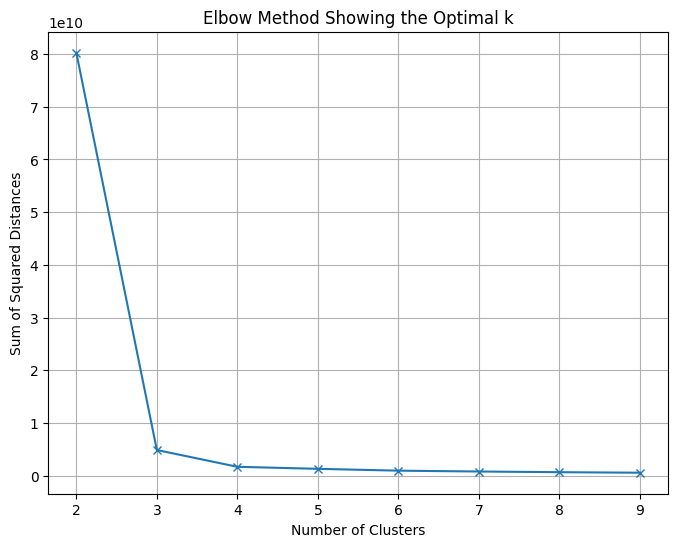

Optimal number of clusters based on silhouette score: 4 with a silhouette score of: 0.98


In [137]:
trainer.findOptimumClusterNumber(x, 9)

In [138]:
trainer.fitAndPredictAll(myAlgorithmArray, x)

An error occurred during SpectralClustering process: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Algorithm                  Silhouette Score
-----------------------  ------------------
AffinityPropagation                0.383604
AgglomerativeClustering            0.983557
Birch                              0.98449
DBSCAN                            -0.932828
MiniBatchKMeans                    0.743921
MeanShift                          0.98449
OPTICS                            -0.287074
GaussianMixture                    0.983168
KMeans                             0.98449


In [139]:
model = KMeans(n_clusters= 4)

In [140]:
model.fit(x)

KMeans(n_clusters=4)

In [141]:
result = model.predict(x)

In [142]:
result

array([0, 0, 1, ..., 0, 0, 0])

In [143]:
df["Clusters"] = result

In [146]:
silhouette_score(x, result)

0.9844899865729019